In [1]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#data = pd.DataFrame(tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz'))

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

x_train = pd.DataFrame(x_train, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
x_test = pd.DataFrame(x_test, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
x_train.shape, x_test.shape

57026/57026 [==============================] - 0s 0us/step


((404, 13), (102, 13))

In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]), # get all values between 0 and 1
    remainder="passthrough"
)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [3]:
x_train_normal.shape, x_test_normal.shape

((404, 13), (102, 13))

In [4]:
# Set random seed
tf.random.set_seed(42)

# Build the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.01),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = model.fit(x_train_normal, y_train, epochs=200) 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
13/13 [==============================] - 1s 4ms/step - loss: 14.3457 - mae: 14.3457
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 6.3362 - mae: 6.3362
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 5.1244 - mae: 5.1244
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 4.7331 - mae: 4.7331
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 4.2630 - mae: 4.2630
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 3.5753 - mae: 3.5753
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 3.4353 - mae: 3.4353
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 3.5355 - mae: 3.5355
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 3.1892 - mae: 3.1892
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 3.1303 - mae: 3.1303
Epoch 11/200
13/13 [==============================] - 0s 

In [7]:
model.evaluate(x_test_normal, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.2878 - mae: 2.2878


[2.2877919673919678, 2.2877919673919678]

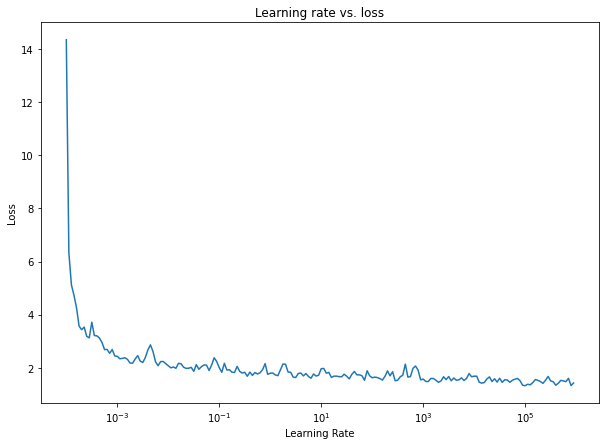

In [6]:
lrs = 1e-4 * (10 ** (np.arange(200)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");